## ARCH and GARCH models

In [1]:
# Import necessary libraries
!pip install arch matplotlib pandas numpy
import numpy as np  # Library for numerical calculations
import pandas as pd  # Library for handling data
from arch import arch_model  # ARCH and GARCH modeling package
import matplotlib.pyplot as plt  # Library for plotting data

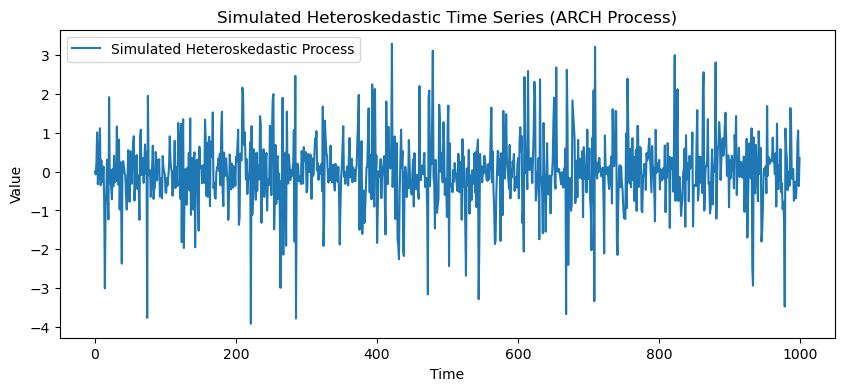

In [2]:
# Step 1: Simulate Heteroskedastic Process (ARCH(1))
np.random.seed(42)  # Set the random seed for reproducibility

# Length of the time series
n = 1000  # Generate 1000 data points

# Simulating an ARCH(1) process
omega = 0.1  # Constant for the variance equation
alpha1 = 0.8  # Coefficient for the lagged squared residual in ARCH(1)
epsilon = np.random.randn(n)  # Generate random normal noise (white noise)
sigma2 = np.zeros(n)  # Initialize an array for the conditional variances
y = np.zeros(n)  # Initialize an array for the time series data

# Generate time series with heteroskedasticity (ARCH process)
for t in range(1, n):  # Loop through time points 1 to n-1
    sigma2[t] = omega + alpha1 * epsilon[t-1]**2  # Compute the conditional variance
    y[t] = np.sqrt(sigma2[t]) * epsilon[t]  # Generate the time series data with heteroskedasticity

# Save to a Pandas DataFrame
data = pd.DataFrame({'y': y})  # Store the simulated time series in a DataFrame

# Plot the generated time series
plt.figure(figsize=(10, 4))  # Set the figure size for the plot
plt.plot(data['y'], label='Simulated Heteroskedastic Process')  # Plot the simulated time series
plt.title('Simulated Heteroskedastic Time Series (ARCH Process)')  # Add a title to the plot
plt.xlabel('Time')  # Label the x-axis
plt.ylabel('Value')  # Label the y-axis
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot

In [3]:
# Step 2: Fit an ARCH(1) Model
arch_model_fit = arch_model(data['y'], vol='ARCH', p=1).fit(disp="off")  # Fit an ARCH(1) model to the data
print(arch_model_fit.summary())  # Print the summary of the fitted model

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1179.87
Distribution:                  Normal   AIC:                           2365.74
Method:            Maximum Likelihood   BIC:                           2380.46
                                        No. Observations:                 1000
Date:                Thu, Aug 22 2024   Df Residuals:                      999
Time:                        09:50:13   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0142  1.989e-02     -0.715      0.475 

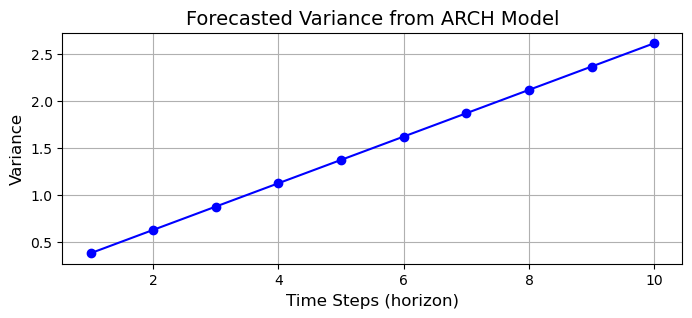

In [4]:
# Forecast Using the Fitted ARCH Model
arch_forecast = arch_model_fit.forecast(horizon=10)

# Extract the forecasted variance
forecasted_variance = arch_forecast.variance[-1:].values.flatten()

# Create a plot for the forecasted variance
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), forecasted_variance, marker='o', linestyle='-', color='b')
plt.title('Forecasted Variance from ARCH Model', fontsize=14)
plt.xlabel('Time Steps (horizon)', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.grid(True)
plt.show()

In [5]:
# Step 4: Fit a GARCH(1,1) Model
garch_model_fit = arch_model(data['y'], vol='Garch', p=1, q=1).fit(disp="off")  # Fit a GARCH(1,1) model to the data
print(garch_model_fit.summary())  # Print the summary of the fitted GARCH model

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1179.87
Distribution:                  Normal   AIC:                           2367.74
Method:            Maximum Likelihood   BIC:                           2387.37
                                        No. Observations:                 1000
Date:                Thu, Aug 22 2024   Df Residuals:                      999
Time:                        09:50:13   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0142  1.995e-02     -0.712      0.476 

In [6]:
# Step 5: Forecast Using the Fitted GARCH Model
garch_forecast = garch_model_fit.forecast(horizon=10)  # Forecast 10 steps ahead using the fitted GARCH model
print(garch_forecast.variance[-1:])  # Print the variance forecast for the last 10 steps

         h.01      h.02      h.03      h.04      h.05      h.06      h.07  \
999  0.376747  0.625164  0.873581  1.121998  1.370415  1.618832  1.867249   

         h.08      h.09    h.10  
999  2.115666  2.364083  2.6125  
